In [1]:
import numpy as np
from math import cos, sin
import sys
from PIL import Image, ImageDraw, ImageColor
from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker

In [2]:
from util_functions import wireIntegrate, cutoffPercentile, toGreyScale, createXYGrid, createXZGrid, createXYZGrid

In [3]:
meshsize = 120  # The size of the mesh grid
I = 1 # 1 amp of current flowing through coil
mu0 = 4 *np.pi*10**(-7)  # magnetic permeability constant
radius = .03  # radius of coil in meters
#bbox = (-.05,-.05, -.05, .05, .05, .05)  # bounding box of visual area in meters
bbox = (-.05,-.05, .05, .05)  # bounding box of visual area in meters
xgrid, ygrid, vecs = createXYGrid(bbox, meshsize)
print(vecs.shape)

(120, 120, 3)


bbox = (-.05,-.05, -0.05, .05, .05, 0.05)  # bounding box of visual area in meters
xgrid,ygrid,zgrid,vecs = createXYZGrid(bbox, meshsize)
print(xgrid.shape,vecs.shape)

In [4]:
angnum = 360  # The number of evenly spaced angle values around a circumference of length 2*pi*R


angles = np.linspace(0, 2*np.pi, angnum, endpoint=False)

# create an array of the vector l
coss = np.cos(angles)
sins = np.sin(angles)
zz = np.zeros_like(angles)
l = np.stack((coss, sins, zz), axis=-1)*radius

In [5]:

bField = I*wireIntegrate(vecs, l)  # Integrate the field around the wire
      
# Now we are only interested in the magnitude of the integral result rather
# than it's direction.
magnitudes = np.linalg.norm(bField * mu0/(4*np.pi), axis=-1)
print (magnitudes.shape)




(120, 120)


9.987973e-07 5.1563882e-05


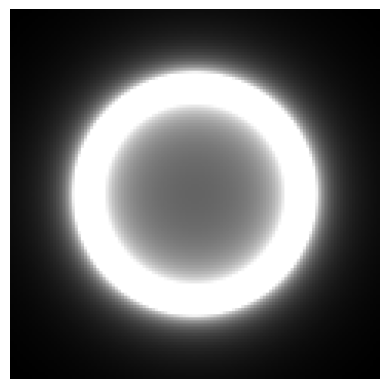

In [6]:
mags = cutoffPercentile(magnitudes, 85)
arrint = toGreyScale(mags)

imsize = (600,600)
resolution = arrint.shape[0]
im = Image.new("RGB", imsize)
px=im.load()

d = ImageDraw.Draw(im)

xlen = int(imsize[0]/resolution)
ylen = int(imsize[1]/resolution)
#print ( xlen, ylen)
for ii in range(resolution):
    for jj in range(resolution):
        rect = ((ii*xlen, jj*ylen), ((ii+1)*xlen-1, (jj+1)*ylen-1))
        px = arrint[ii,jj]
        colourStr = "rgb( {}, {}, {} )".format(int(px), int(px), int(px))
        d.rectangle(rect, fill=colourStr)
#d.ellipse(bbox, outline="yellow", width=1)
#im.save(os.path.join(picPath, "Biot-savart-loop85.png"))
plt.axis("off")
plt.imshow(im)

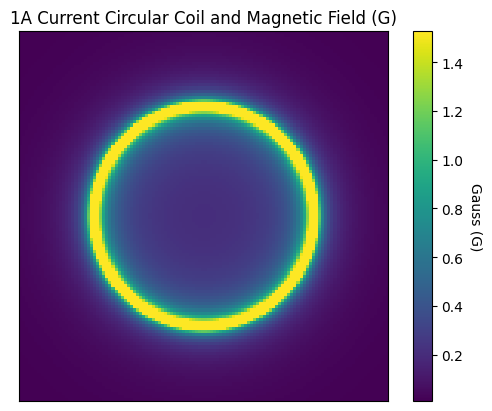

In [7]:
mags = cutoffPercentile(magnitudes, 95)

fig,ax = plt.subplots()
plt.title("1A Current Circular Coil and Magnetic Field (G)")

ax.xaxis.set_major_locator(ticker.NullLocator())
ax.yaxis.set_major_locator(ticker.NullLocator())

im = ax.imshow(mags*10000)  # Convert to Gauss units
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Gauss (G)", rotation=-90, va="bottom")

plt.show()


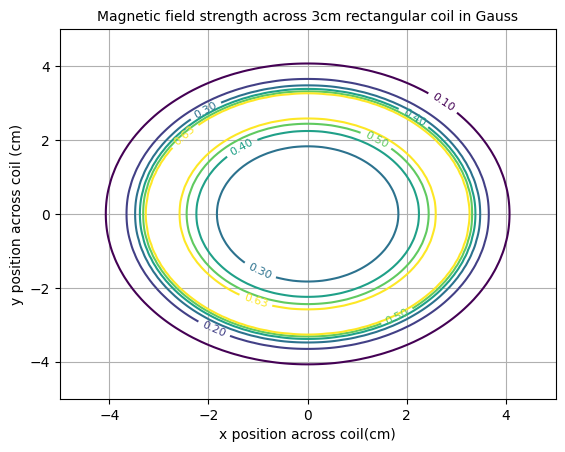

In [8]:
fig,ax = plt.subplots()
CS = ax.contour(xgrid*100, ygrid*100, mags*10000, levels=(.1, .2, .3,.4,.5,.63 ))
ax.clabel(CS, inline=True, fontsize=8)
ax.grid()
ax.set_title("Magnetic field strength across 3cm rectangular coil in Gauss", fontsize=10)
ax.set(xlabel='x position across coil(cm)', ylabel='y position across coil (cm)')
plt.show()

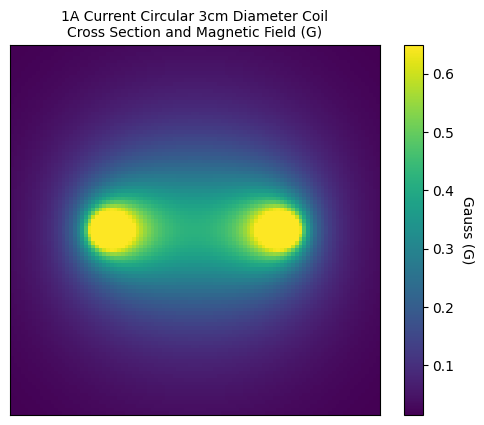

In [9]:
# Now we will look at a slice through the middle
meshsize = 100
bbox = (-.03,-.03, .03, .03)  # bounding box of visual area in meters

# create the individual position vectors
xgrid, zgrid, vecs = createXZGrid(bbox, meshsize)
radius = .015
l = np.stack((coss, sins, zz), axis=-1)*radius

bField = wireIntegrate(vecs, l)  # Integrate the field around the wire
      
# Now we are only interested in the magnitude of the integral result rather
# than it's direction.
magnitudes = np.linalg.norm(bField * mu0/(4*np.pi), axis=2)

mags = cutoffPercentile(magnitudes, 98)

fig,ax = plt.subplots()
plt.title("1A Current Circular 3cm Diameter Coil\nCross Section and Magnetic Field (G)", fontsize=10)

ax.xaxis.set_major_locator(ticker.NullLocator())
ax.yaxis.set_major_locator(ticker.NullLocator())

im = ax.imshow(mags*10000)  # Convert to Gauss units
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Gauss (G)", rotation=-90, va="bottom")

plt.show()


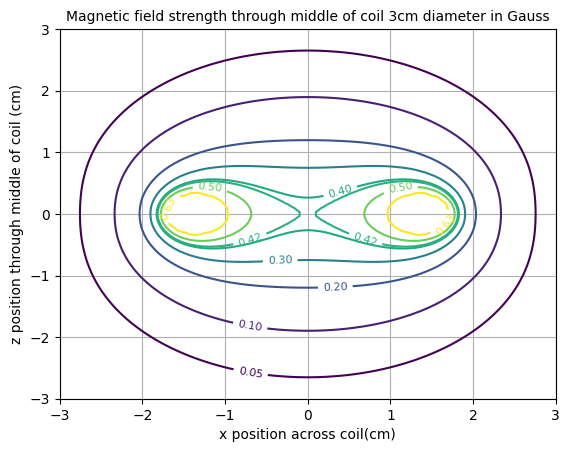

In [10]:
fig,ax = plt.subplots()
CS = ax.contour(xgrid*100, zgrid*100, mags*10000, levels=(.05,.1, .2, .3,.4,.42,.5,.63 ))
ax.clabel(CS, inline=True, fontsize=8)
ax.grid()
ax.set_title("Magnetic field strength through middle of coil 3cm diameter in Gauss", fontsize=10)
ax.set(xlabel='x position across coil(cm)', ylabel='z position through middle of coil (cm)')
plt.show()


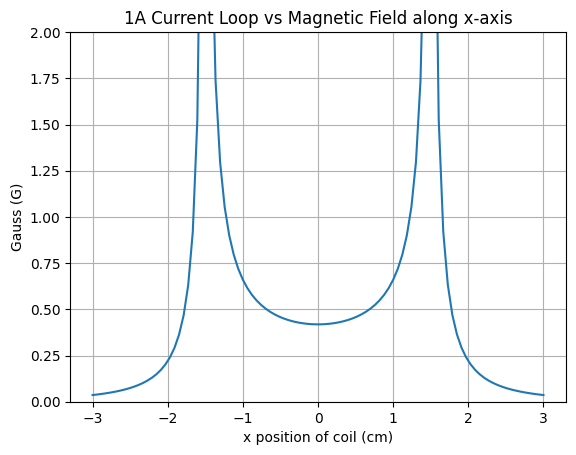

In [11]:
slice1 =  magnitudes.shape[1] // 2

x = xgrid[slice1, :]
y = magnitudes[slice1, :]

fig,ax = plt.subplots()
plt.title("1A Current Loop vs Magnetic Field along x-axis", fontsize=12)
ax.plot(x*100, y*10000)
ax.set(xlabel='x position of coil (cm)', ylabel='Gauss (G)')
ax.set_ylim(bottom=0, top=2)
ax.grid()
plt.show()

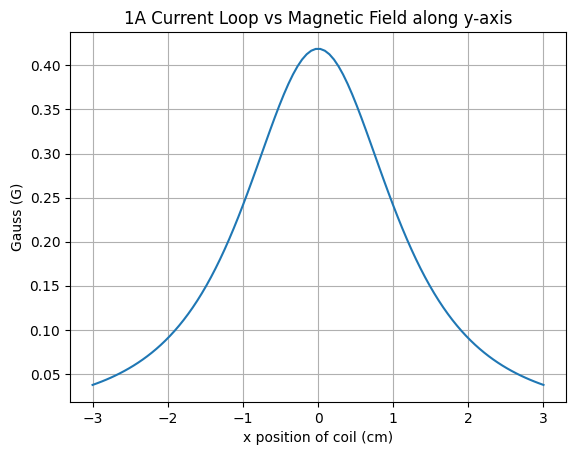

In [12]:
slice1 =  magnitudes.shape[1] // 2

x = xgrid[slice1, :]
y = magnitudes[ :, slice1]

fig,ax = plt.subplots()
plt.title("1A Current Loop vs Magnetic Field along y-axis", fontsize=12)
ax.plot(x*100, y*10000)
ax.set(xlabel='x position of coil (cm)', ylabel='Gauss (G)')

ax.grid()
plt.show()

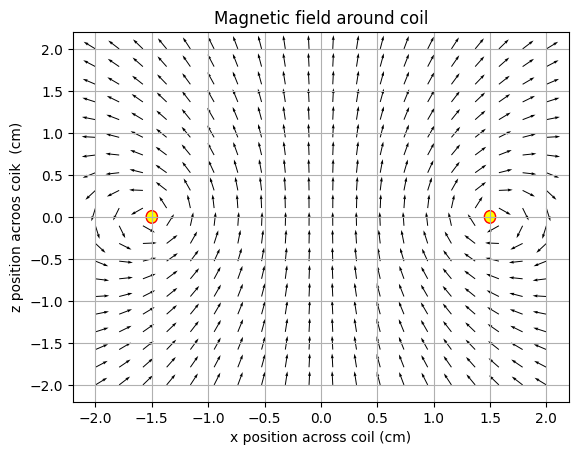

In [13]:
import numpy as np
from math import cos, sin
import sys
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Ellipse
import matplotlib.transforms as mtransforms

meshsize = 20
I = 1 # 1 amp
mu0 = 4 *np.pi*10**(-7)
radius = .015
bbox = (-.02,-.02, .02, .02)
x1, y1, x2, y2 = bbox
xspace=np.linspace(x1, x2 ,meshsize)
yspace=np.linspace(y1,y2,meshsize)
xgrid, zgrid =np.meshgrid(xspace, yspace)
zeroes = np.zeros(xgrid.shape)

# create the individual position vectors
vecs = np.dstack((xgrid,  zeroes, zgrid))

integrand_vecsum = np.zeros_like(vecs, dtype=np.float32)
angnum = 720


angles = np.linspace(0, 2*np.pi, angnum, endpoint=False)

#print(angles)
coss = np.cos(angles)
sins = np.sin(angles)
zz = np.zeros_like(angles)



l = np.stack((coss, sins, zz), axis=-1)*radius

bField = wireIntegrate(vecs, l)  # Integrate the field around the wire
mags = np.linalg.norm(bField * mu0/(4*np.pi), axis=2)
minv = np.amin(mags[~np.isnan(mags)])
maxv = np.amax(mags[~np.isnan(mags)])

uv = (np.array([bField[:,:,0], bField[:,:,2]]).T)

# Because a nxn matrix is not broadcastable via a nxnx3 matrix make the smaller into a nxnx3 matrix by repeating
 # it's entries 3 times
norms = np.repeat(np.linalg.norm(uv, axis=-1)[:,:,np.newaxis], 2, axis=2)
uv = (uv/norms).T

fig, ax = plt.subplots()

X = xgrid
Y = zgrid

q = ax.quiver(xspace*100, yspace*100, uv[0], uv[1], width=.002)
ax.grid()
plt.title("Magnetic field around coil")
ax.set(xlabel='x position across coil (cm)', ylabel='z position acroos coik  (cm)')
circle1 = Ellipse((-radius*100, 0), .1, .15, facecolor='yellow', edgecolor='red')
circle2 = Ellipse((radius*100, 0), .1, .15, facecolor='yellow', edgecolor='red')
#ax.text(200, 200, 'This is some text {} {}'.format(minv, maxv), transform=mtransforms.IdentityTransform())
ax.add_patch(circle1)
ax.add_patch(circle2)

plt.show()


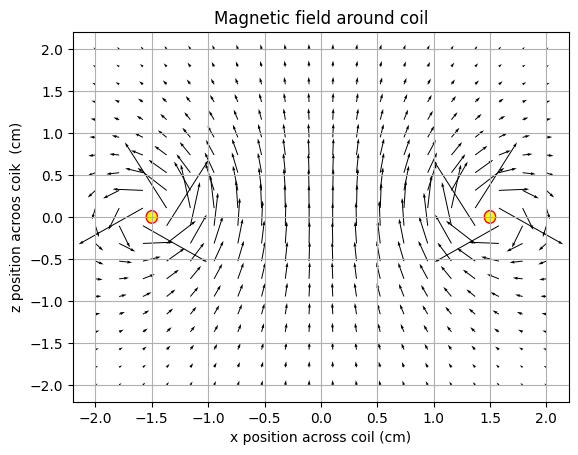

In [14]:
import numpy as np
from math import cos, sin
import sys
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Ellipse
import matplotlib.transforms as mtransforms

meshsize = 20
I = 1 # 1 amp
mu0 = 4 *np.pi*10**(-7)
radius = .015
bbox = (-.02,-.02, .02, .02)
x1, y1, x2, y2 = bbox
xspace=np.linspace(x1, x2 ,meshsize)
yspace=np.linspace(y1,y2,meshsize)
xgrid, zgrid =np.meshgrid(xspace, yspace)
zeroes = np.zeros(xgrid.shape)

# create the individual position vectors
vecs = np.dstack((xgrid,  zeroes, zgrid))

integrand_vecsum = np.zeros_like(vecs, dtype=np.float32)
angnum = 720


angles = np.linspace(0, 2*np.pi, angnum, endpoint=False)

#print(angles)
coss = np.cos(angles)
sins = np.sin(angles)
zz = np.zeros_like(angles)



l = np.stack((coss, sins, zz), axis=-1)*radius

bField = wireIntegrate(vecs, l)  # Integrate the field around the wire
mags = np.linalg.norm(bField * mu0/(4*np.pi), axis=2)
minv = np.amin(mags[~np.isnan(mags)])
maxv = np.amax(mags[~np.isnan(mags)])

uv = (np.array([bField[:,:,0], bField[:,:,2]]).T)

# Because a nxn matrix is not broadcastable via a nxnx3 matrix make the smaller into a nxnx3 matrix by repeating
 # it's entries 3 times
norms = np.repeat(np.linalg.norm(uv, axis=-1)[:,:,np.newaxis], 2, axis=2)
uv = (uv).T

fig, ax = plt.subplots()

X = xgrid
Y = zgrid

q = ax.quiver(xspace*100, yspace*100, uv[0], uv[1], width=.002)
ax.grid()
plt.title("Magnetic field around coil")
ax.set(xlabel='x position across coil (cm)', ylabel='z position acroos coik  (cm)')
circle1 = Ellipse((-radius*100, 0), .1, .15, facecolor='yellow', edgecolor='red')
circle2 = Ellipse((radius*100, 0), .1, .15, facecolor='yellow', edgecolor='red')
#ax.text(200, 200, 'This is some text {} {}'.format(minv, maxv), transform=mtransforms.IdentityTransform())
ax.add_patch(circle1)
ax.add_patch(circle2)

plt.show()


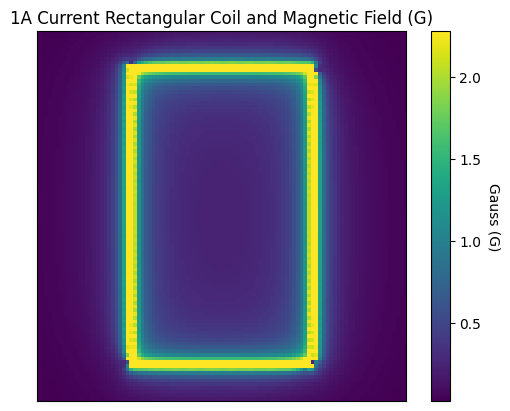

In [15]:
recx = 0.02
recy = 0.0325

xnum = 40
ynum = 40

bbox = (-.04,-.04, .04, .04)  # bounding box of visual area in meters
meshsize=100
xgrid, ygrid, vecs = createXYGrid(bbox , meshsize)

xwire = np.linspace(-recx, recx, xnum, endpoint=False)
yconst = np.empty(xnum, dtype=np.float32)
yconst.fill(recy)
zz1 = np.zeros_like(yconst)
l1 = np.stack((xwire, yconst, zz1), axis=-1)

ywire = np.linspace(-recy, recy, ynum, endpoint=False)
xconst = np.empty(ynum, dtype=np.float32)
xconst.fill(recx)
zz2 = np.zeros_like(xconst)
l2 = np.stack((xconst, np.flip(ywire), zz2), axis=-1)

yconst2 = np.empty(ynum, dtype=np.float32)
yconst2.fill(-recy)
l3 =  np.stack((np.flip(xwire), yconst2, zz1), axis=-1)

xconst2 = np.empty(ynum, dtype=np.float32)
xconst2.fill(-recx)
l4 = np.stack((xconst2[1:], ywire[1:], zz2[1:]), axis=-1)

l = np.concatenate((l1, l2, l3, l4, [l1[0]]), dtype=np.float32)

bField = wireIntegrate(vecs, l)  # Integrate the field around the wire
      
# Now we are only interested in the magnitude of the integral result rather
# than it's direction.
magnitudes = np.linalg.norm(bField * mu0/(4*np.pi), axis=2)
mags = cutoffPercentile(magnitudes, 95)

fig,ax = plt.subplots()
plt.title("1A Current Rectangular Coil and Magnetic Field (G)")

ax.xaxis.set_major_locator(ticker.NullLocator())
ax.yaxis.set_major_locator(ticker.NullLocator())

im = ax.imshow(mags*10000)  # Convert to Gauss units
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Gauss (G)", rotation=-90, va="bottom")

plt.show()

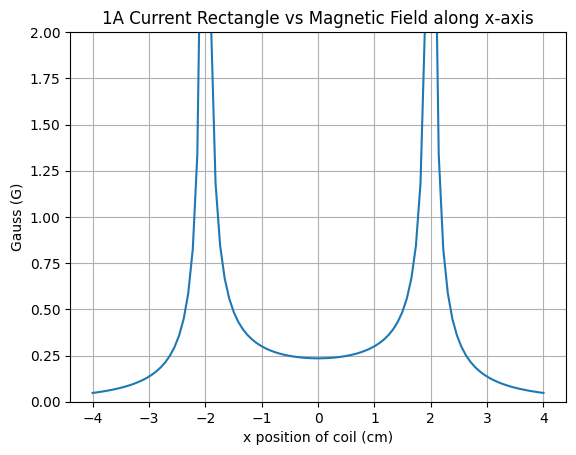

In [16]:
slice1 =  magnitudes.shape[1] // 2

x = xgrid[slice1, :]
y = magnitudes[slice1, :]

fig,ax = plt.subplots()
plt.title("1A Current Rectangle vs Magnetic Field along x-axis", fontsize=12)
ax.plot(x*100, y*10000)
ax.set(xlabel='x position of coil (cm)', ylabel='Gauss (G)')
ax.set_ylim(bottom=0, top=2)
ax.grid()
plt.show()

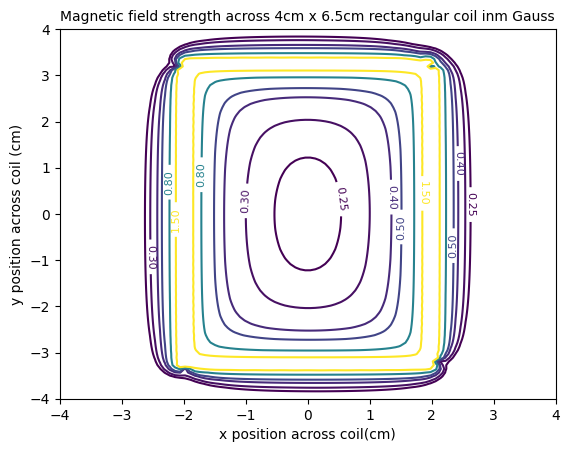

In [17]:
fig,ax = plt.subplots()
CS = ax.contour(xgrid*100, ygrid*100, mags*10000, levels=(.25, .3,.4,.5,.8 ,1.5))
ax.clabel(CS, inline=True, fontsize=8)
ax.set_title("Magnetic field strength across 4cm x 6.5cm rectangular coil inm Gauss", fontsize=10)
ax.set(xlabel='x position across coil(cm)', ylabel='y position across coil (cm)')
plt.show()
             

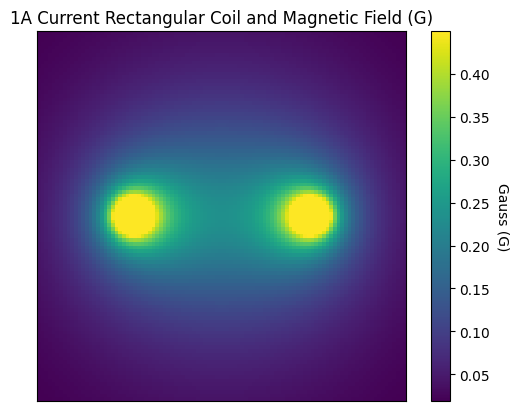

In [18]:
recx = 0.02
recy = 0.0325

xnum = 40
ynum = 40

bbox = (-.04,-.04, .04, .04)  # bounding box of visual area in meters

xgrid, ygrid, vecs = createXZGrid(bbox , meshsize)

xwire = np.linspace(-recx, recx, xnum, endpoint=False)
yconst = np.empty(xnum, dtype=np.float32)
yconst.fill(recy)
zz1 = np.zeros_like(yconst)
l1 = np.stack((xwire, yconst, zz1), axis=-1)

ywire = np.linspace(-recy, recy, ynum, endpoint=False)
xconst = np.empty(ynum, dtype=np.float32)
xconst.fill(recx)
zz2 = np.zeros_like(xconst)
l2 = np.stack((xconst, np.flip(ywire), zz2), axis=-1)

yconst2 = np.empty(ynum, dtype=np.float32)
yconst2.fill(-recy)
l3 =  np.stack((np.flip(xwire), yconst2, zz1), axis=-1)

xconst2 = np.empty(ynum, dtype=np.float32)
xconst2.fill(-recx)
l4 = np.stack((xconst2[1:], ywire[1:], zz2[1:]), axis=-1)

l = np.concatenate((l1, l2, l3, l4, [l1[0]]), dtype=np.float32)

bField = wireIntegrate(vecs, l)  # Integrate the field around the wire
      
# Now we are only interested in the magnitude of the integral result rather
# than it's direction.
magnitudes = np.linalg.norm(bField * mu0/(4*np.pi), axis=2)
mags = cutoffPercentile(magnitudes, 98)

fig,ax = plt.subplots()
plt.title("1A Current Rectangular Coil and Magnetic Field (G)")

ax.xaxis.set_major_locator(ticker.NullLocator())
ax.yaxis.set_major_locator(ticker.NullLocator())

im = ax.imshow(mags*10000)  # Convert to Gauss units
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Gauss (G)", rotation=-90, va="bottom")

plt.show()

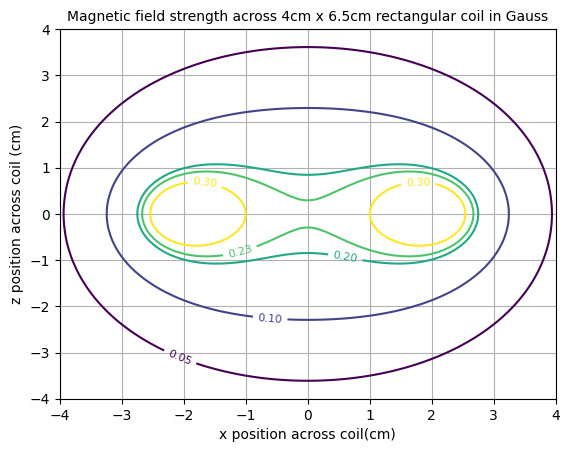

In [19]:
fig,ax = plt.subplots()
CS = ax.contour(xgrid*100, ygrid*100, magnitudes*10000, levels=(.05, .1, .2, .23, .3))
ax.clabel(CS, inline=True, fontsize=8)
ax.set_title("Magnetic field strength across 4cm x 6.5cm rectangular coil in Gauss", fontsize=10)
ax.set(xlabel='x position across coil(cm)', ylabel='z position across coil (cm)')
ax.grid()
plt.show()



In [20]:
angnum = 720  # The number of evenly spaced angle values around a circumference of length 2*pi*R
radius = 0.01
meshsize = 200
angles = np.linspace(0, 2*np.pi, angnum, endpoint=False)

# create an array of the vector l
coss = np.cos(angles)
sins = np.sin(angles)
zz = np.zeros_like(angles)
ls = []
for l1 in (-0.02, 0 , 0.02):
    for l2 in (-0.02, 0, 0.02):
        li = np.stack((coss, sins, zz), axis=-1)*radius - np.array([l1, l2, 0])
        ls.append(li)
bbox = (-.04,-.04, .04, .04)  # bounding box of visual area in meters

xgrid, ygrid, vecs = createXYGrid(bbox , meshsize)

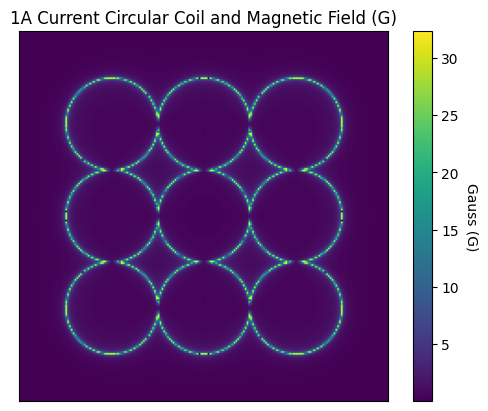

In [21]:
bField = wireIntegrate(vecs, ls)  # Integrate the field around the wire
      
# Now we are only interested in the magnitude of the integral result rather
# than it's direction.
magnitudes = np.linalg.norm(bField * mu0/(4*np.pi), axis=2)


mags = cutoffPercentile(magnitudes, 99)

fig,ax = plt.subplots()
plt.title("1A Current Circular Coil and Magnetic Field (G)")

ax.xaxis.set_major_locator(ticker.NullLocator())
ax.yaxis.set_major_locator(ticker.NullLocator())

im = ax.imshow(mags*10000)  # Convert to Gauss units
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Gauss (G)", rotation=-90, va="bottom")

plt.show()


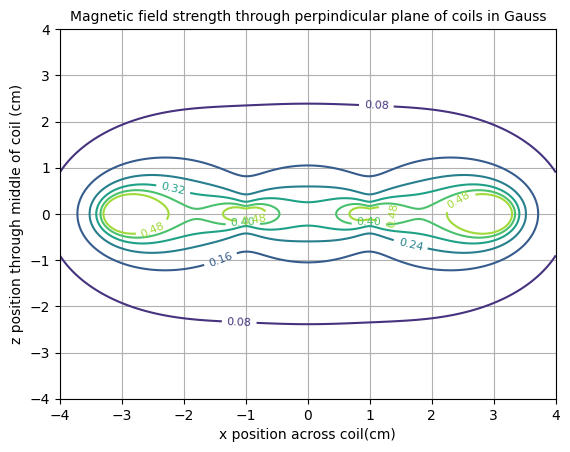

In [22]:
# create the individual position vectors
xgrid, zgrid, vecs = createXZGrid(bbox, meshsize)

bField = wireIntegrate(vecs, ls)  # Integrate the field around the wire
      
# Now we are only interested in the magnitude of the integral result rather
# than it's direction.
magnitudes = np.linalg.norm(bField * mu0/(4*np.pi), axis=2)

mags = cutoffPercentile(magnitudes, 98)

fig,ax = plt.subplots()
CS = ax.contour(xgrid*100, zgrid*100, mags*10000)
ax.clabel(CS, inline=True, fontsize=8)
ax.grid()
ax.set_title("Magnetic field strength through perpindicular plane of coils in Gauss", fontsize=10)
ax.set(xlabel='x position across coil(cm)', ylabel='z position through middle of coil (cm)')
plt.show()

In [23]:
angnum = 720  # The number of evenly spaced angle values around a circumference of length 2*pi*R
radius = 0.01
meshsize = 200
angles = np.linspace(0, 2*np.pi, angnum, endpoint=False)

# create an array of the vector l
coss = np.cos(angles)
sins = np.sin(angles)
zz = np.zeros_like(angles)
ls = []
l = np.stack((coss, sins, zz), axis=-1)*radius - np.array([0, 0, 0])
bbox = (-.04,-.04, .04, .04)  # bounding box of visual area in meters

xgrid, ygrid, vecs = createXYGrid(bbox , meshsize)

In [24]:
bField = wireIntegrate(vecs, l)  # Integrate the field around the wire

In [25]:
print (bField.shape)


(200, 200, 3)


In [26]:
with open("bField.npy","wb") as f:
    np.save(f, bField)

(200, 200)


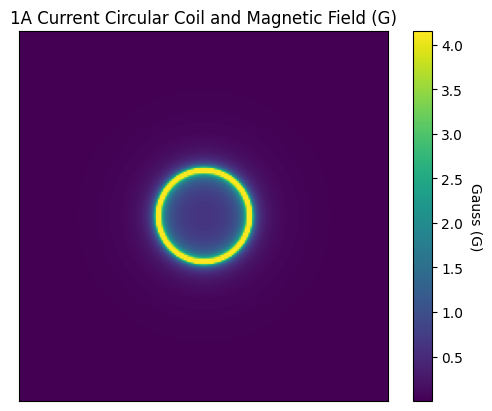

In [27]:
      
# Now we are only interested in the magnitude of the integral result rather
# than it's direction.
#magnitudes = np.linalg.norm(bField * mu0/(4*np.pi), axis=2)
magnitudes = np.linalg.norm(bField * mu0/(4*np.pi), axis=2)

mags = cutoffPercentile(magnitudes, 99)
print (mags.shape)

fig,ax = plt.subplots()
plt.title("1A Current Circular Coil and Magnetic Field (G)")

ax.xaxis.set_major_locator(ticker.NullLocator())
ax.yaxis.set_major_locator(ticker.NullLocator())

im = ax.imshow(mags*10000)  # Convert to Gauss units
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Gauss (G)", rotation=-90, va="bottom")

plt.show()

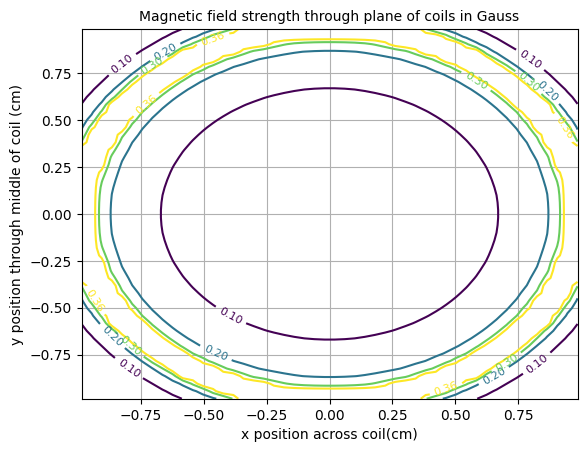

In [28]:
fig,ax = plt.subplots()
xgrid2 = xgrid[75:125, 75:125]
ygrid2 = ygrid[75:125, 75:125]
mags2 = mags[75:125, 75:125]
CS = ax.contour(xgrid2*100, ygrid2*100, mags2*1000,  levels=(.1, .2, .3, .36) )
ax.clabel(CS, inline=True, fontsize=8)
ax.grid()
ax.set_title("Magnetic field strength through plane of coils in Gauss", fontsize=10)
ax.set(xlabel='x position across coil(cm)', ylabel='y position through middle of coil (cm)')
plt.show()